In [6]:
#Stefans document
import numpy as np
import os
import matplotlib.pyplot as plt
import scipy.optimize as sp
import scipy.constants as const
plt.rcParams['figure.dpi'] = 150
%matplotlib inline
plt.rc("axes", labelsize=14)
plt.rc("xtick", labelsize=14, top=True, direction="in")
plt.rc("ytick", labelsize=14, right=True, direction="in")
plt.rc("axes", titlesize=14)
plt.rc("legend", fontsize=14, loc="upper left")

cm = 1.5/2.54 #define ratio for cm and inches

In [7]:
Data_names = []

# Method for going through all the data we have, and it fucking works dawg
for (dir_path, dir_names, file_names) in os.walk('./Data_Labday_1'):
    for file_name in file_names:
        if file_name.endswith('.txt'): #ensures we grab only the files ending with .txt
            Data_names.append(os.path.join(dir_path, file_name))

In [8]:
time = [] #array for all time data lists
V1 = [] #Same again for votlage readings

for Data_name in Data_names:
    Data = np.loadtxt(Data_name, skiprows=3)
    time.append(np.linspace(0, 10, len(Data[:, 0])))
    V1.append(Data[:, 1])  # Assuming V1 is in the first column
    #print(time)
    #print(V1)

In [9]:
#Here we make the functions for the fits used
#Guesses for the linear function
a_lin_guess = 0.6 
n_lin_guess = 21e-7
offset_lin_guess = 0.4
p0_lin = [a_lin_guess, n_lin_guess, offset_lin_guess]

l = 0.065 #cm length of weird tube we compress the air in
freq_constant = (2*np.pi)/(633e-9)*l

#Linear fit function hoping that it works on a linear fit
def Linear_fit(t, *p): 
    amplitude = p[0]
    n = p[1]
    offset = p[2]
    return amplitude *(np.cos(freq_constant*2*(n-1)*t)) + offset

#Guesses for the quadratic fit
a_quad_guess = 0.7
n_quad_guess = 21e-7
offset_quad_guess = 0.4
m_quad_guess = 0
p0_Quad = [a_quad_guess, n_quad_guess, offset_quad_guess, m_quad_guess]

#Quadratic fit function if it works like this
def Quad_fit(t, *p): 
    amplitude = p[0]
    n = p[1]
    offset = p[2]
    m = p[3]
    return amplitude *(np.cos(freq_constant*2*((n-1)*t**2+m*t))) + offset

Linear Parameters:
Amplitude: -0.0018580209620572136 $\pm$ 0.005139908903456758
n: 2.4281162682977306e-06 $\pm$ 7.137117461999001e-07
Offset: 14.116778351772162 $\pm$ 0.003634489808612868

Quadratic Parameters:
Amplitude: -0.06000908313656912 +/- [0]
n: 2.1177139272692793e-06 +/- 3.310160476640317e-09
Offset: 14.116962851364967 +/- 0.003634527458339234
m: 1.0225848712100581e-07 +/- 2.3660906703011577e-08


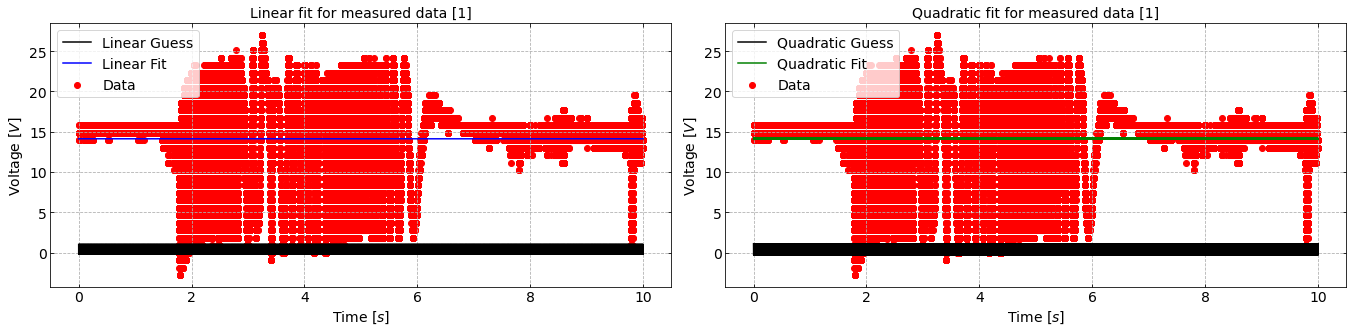

Linear Parameters:
Amplitude: -0.001984418983150609 $\pm$ 0.005208456170396036
n: 2.009145112698064e-06 $\pm$ 3.4290401644061446e-07
Offset: 14.399725000476431 $\pm$ 0.0036829477383176737

Quadratic Parameters:
Amplitude: -0.02509240260445008 +/- [0]
n: 2.1021185342075386e-06 +/- 3.94874807485592e-09
Offset: 14.399782333128368 +/- 0.0036830502784762713
m: 1.744442784465677e-08 +/- 1.3019060510476911e-08


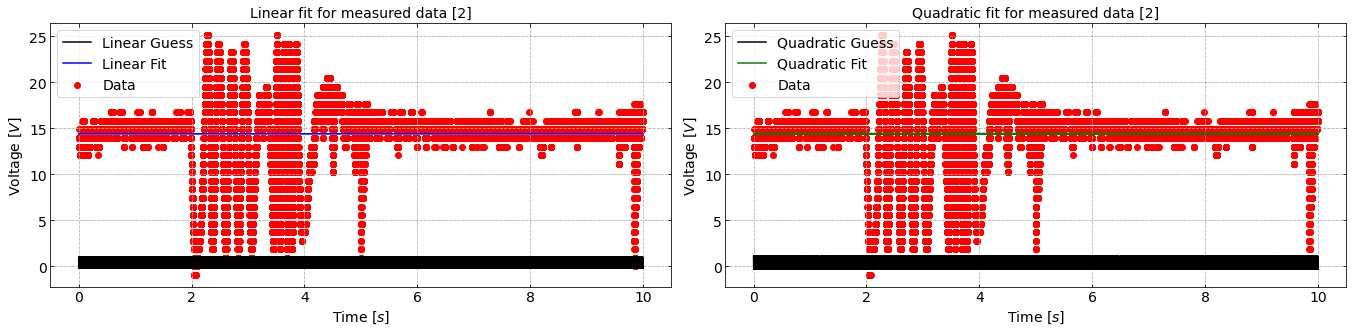

Linear Parameters:
Amplitude: 0.002301110360686842 $\pm$ 0.005320799744822343
n: 1.991794413668107e-06 $\pm$ 3.072683844295097e-07
Offset: 14.007466000716287 $\pm$ 0.0037623508210165055

Quadratic Parameters:
Amplitude: 0.03104614027661408 +/- [0]
n: 2.0912287641436205e-06 +/- 3.844877508146077e-09
Offset: 14.007297558344485 +/- 0.003762493237449384
m: -4.1821639423497173e-08 +/- 1.9393233729973294e-08


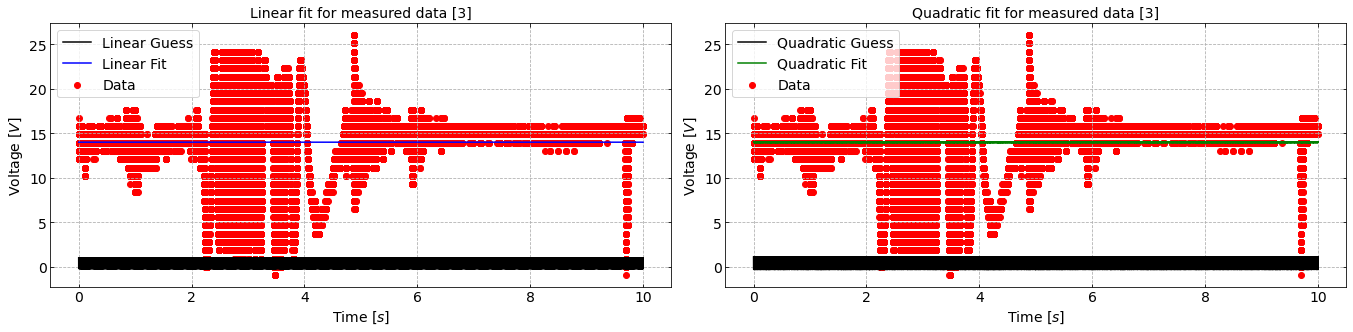

Linear Parameters:
Amplitude: 0.0006249175967958151 $\pm$ 0.004884182767985304
n: 2.181991604318547e-06 $\pm$ 1.0521018903936091e-06
Offset: 11.9825641488635 $\pm$ 0.0034536185184935475

Quadratic Parameters:
Amplitude: 0.045625025921404994 +/- [0]
n: 2.2161611725652596e-06 +/- 7.358077887978868e-09
Offset: 11.982830254158063 +/- 0.003453781807550835
m: -1.2917328744301715e-06 +/- 5.688249034097728e-08


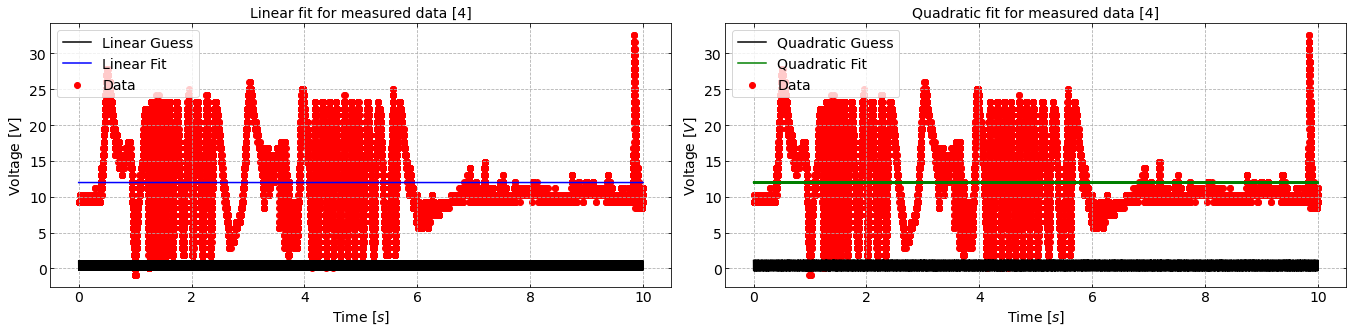

Linear Parameters:
Amplitude: 0.003918232137681265 $\pm$ 0.004661028710687654
n: 2.195466300714254e-06 $\pm$ 1.6324960671489494e-07
Offset: 13.72063503378575 $\pm$ 0.0032958457106655624

Quadratic Parameters:
Amplitude: -0.06945882004111986 +/- [0]
n: 2.1207939476780467e-06 +/- 1.2778798632009192e-09
Offset: 13.72043646744751 +/- 0.003295879767401634
m: 1.87530533671376e-08 +/- 4.3325203385552514e-09


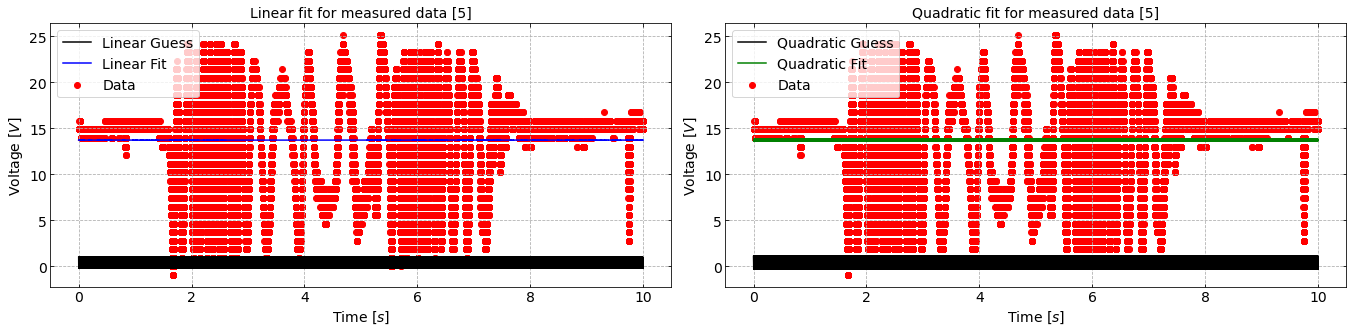

Linear Parameters:
Amplitude: 0.0013579749971270112 $\pm$ 0.004558486611723171
n: 2.0883263743240817e-06 $\pm$ 4.5074608929820323e-07
Offset: 13.648949506422118 $\pm$ 0.0032233253577925772

Quadratic Parameters:
Amplitude: -0.031733865483988884 +/- [0]
n: 2.1002007898499895e-06 +/- 5.758767946369385e-09
Offset: 13.648911624525933 +/- 0.0032233338673788555
m: 1.0903604241716037e-07 +/- 4.145502937768028e-08


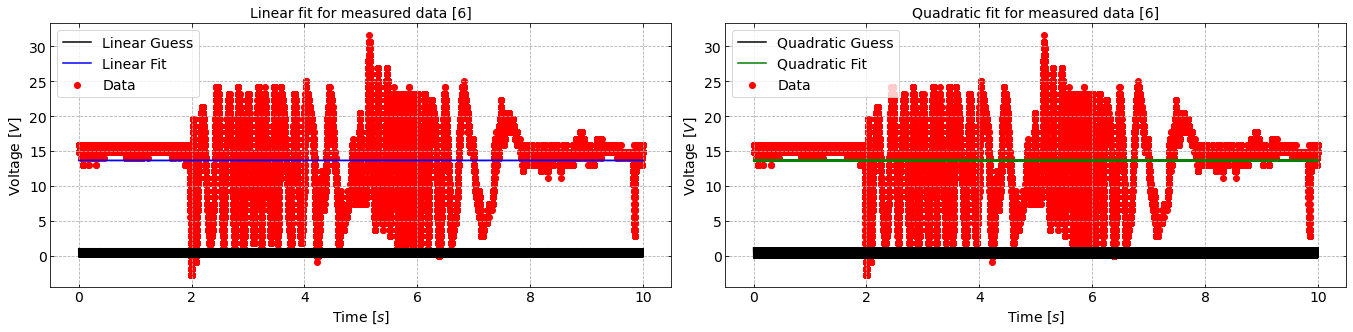

Linear Parameters:
Amplitude: 0.0009894173053714983 $\pm$ 0.0032092464684115285
n: 2.100000892250596e-06 $\pm$ 4.364265797337744e-07
Offset: 13.530079008495598 $\pm$ 0.0022692779196064015

Quadratic Parameters:
Amplitude: 0.0334701643454536 +/- [0]
n: 2.1108837593237017e-06 +/- 5.2517931974130264e-09
Offset: 13.5300943283326 +/- 0.0022692959954173034
m: 2.529828375498123e-07 +/- 3.982866497306639e-08


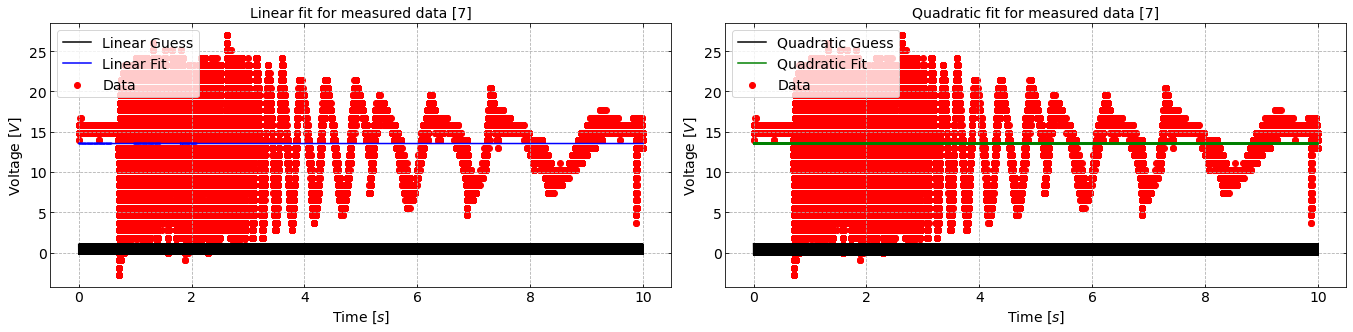

Linear Parameters:
Amplitude: -0.0026125488612640303 $\pm$ 0.004145463720405866
n: 2.1261616514173695e-06 $\pm$ 2.1343844099346775e-07
Offset: 13.867675641377964 $\pm$ 0.002931291163193457

Quadratic Parameters:
Amplitude: 0.02297590247629567 +/- [0]
n: 2.113730701700196e-06 +/- 3.2770000715760535e-09
Offset: 13.867666877226535 +/- 0.0029313321656157794
m: -9.982040119467538e-09 +/- 8.190108237579049e-09


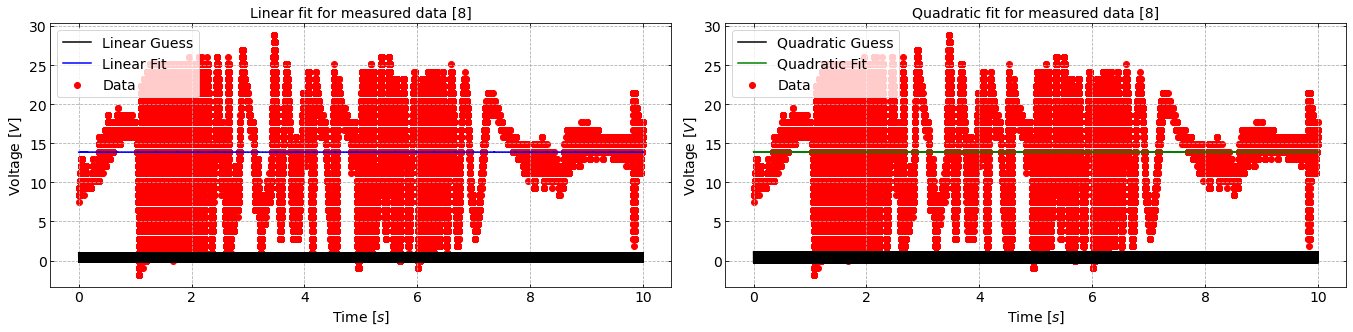

Linear Parameters:
Amplitude: -0.0011530607398719322 $\pm$ 0.0039269857335390455
n: 2.1483976223813123e-06 $\pm$ 4.5792624246825643e-07
Offset: 12.726969418617923 $\pm$ 0.0027767923595112946

Quadratic Parameters:
Amplitude: 0.025229204472212254 +/- [0]
n: 2.1026931401260096e-06 +/- 3.0192600784135024e-09
Offset: 12.727010404312413 +/- 0.002776803830294872
m: 2.11320605378593e-08 +/- 1.0913574436027715e-08


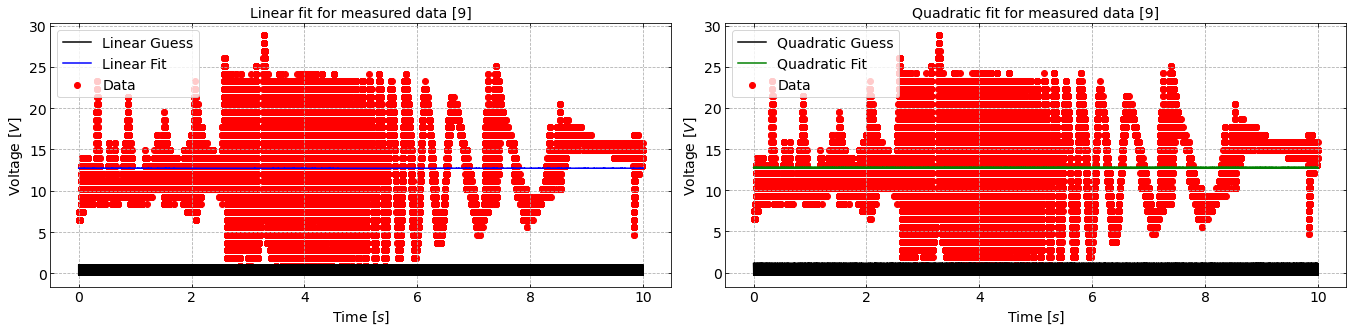

Linear Parameters:
Amplitude: -0.002101850676046907 $\pm$ 0.0033829865289022776
n: 1.896036307433392e-06 $\pm$ 2.2776127155152748e-07
Offset: 13.9708405784766 $\pm$ 0.0023921322979479904

Quadratic Parameters:
Amplitude: -0.03285406075772859 +/- [0]
n: 2.091397942346609e-06 +/- 1.8223905211624472e-09
Offset: 13.970867397811134 +/- 0.0023921416929369938
m: -3.567000612207237e-09 +/- 2.6771297842056026e-09


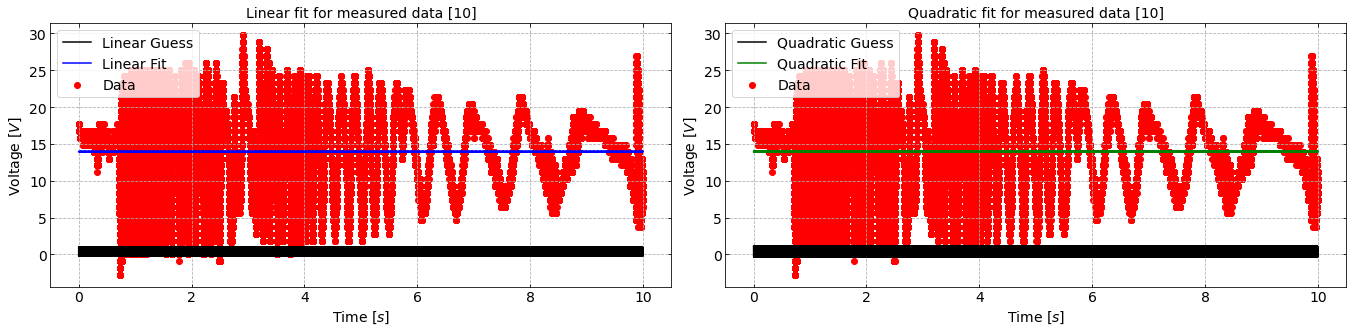

Linear Parameters:
Amplitude: -0.0002962854376181595 $\pm$ 0.003226230665235128
n: 2.203438683926645e-06 $\pm$ 1.4951949963722474e-06
Offset: 13.210638230565896 $\pm$ 0.0022812863687926813

Quadratic Parameters:
Amplitude: 0.0194051384172047 +/- [0]
n: 2.101190641709559e-06 +/- 3.018539610763688e-09
Offset: 13.21063015110402 +/- 0.0022813048735357147
m: -9.229902470172526e-09 +/- 7.136750847423209e-09


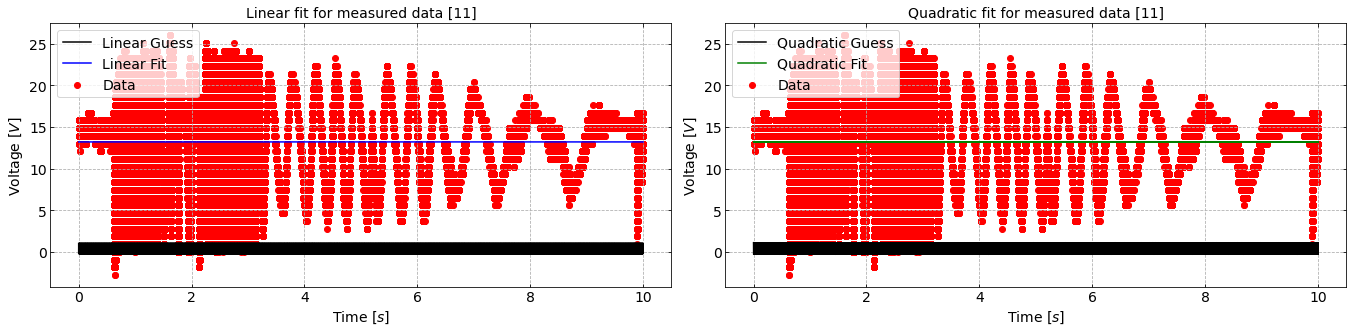

Linear Parameters:
Amplitude: 0.00036815473025079965 $\pm$ 0.003261177813439353
n: 2.2358840830125196e-06 $\pm$ 1.193165864575547e-06
Offset: 14.004372399781795 $\pm$ 0.0023060091329773235

Quadratic Parameters:
Amplitude: 0.013653610562642478 +/- [0]
n: 2.0989396352988407e-06 +/- 8.89343583001871e-09
Offset: 14.004395602081427 +/- 0.0023060180597117216
m: 9.763464260673698e-08 +/- 6.298644758692595e-08


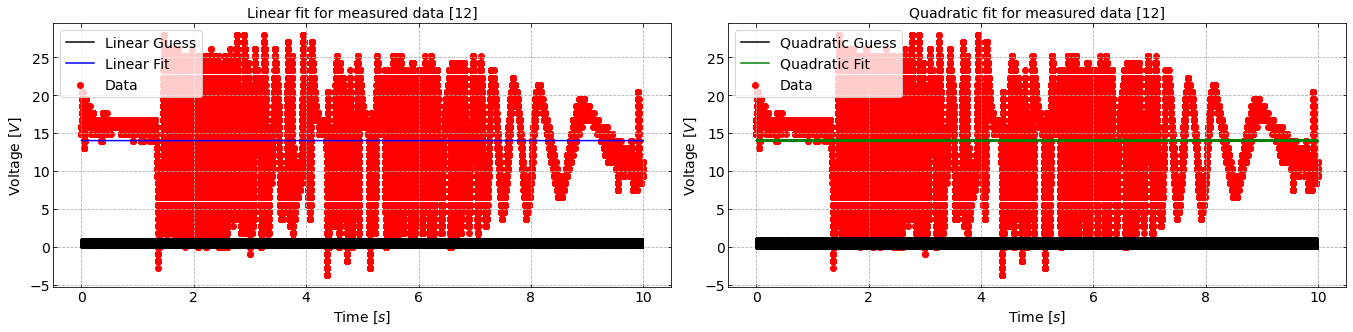

Linear Parameters:
Amplitude: 0.0002764686366049096 $\pm$ 0.004239799862451922
n: 2.0999328971986748e-06 $\pm$ 2.051486903501287e-06
Offset: 13.78517347539369 $\pm$ 0.0029979920308027728

Quadratic Parameters:
Amplitude: 0.029448639005800553 +/- [0]
n: 2.0429421867224898e-06 +/- 7.783708517336485e-09
Offset: 13.785145805160717 +/- 0.0029980099001417305
m: -2.1826215228967692e-07 +/- 5.87703618618733e-08


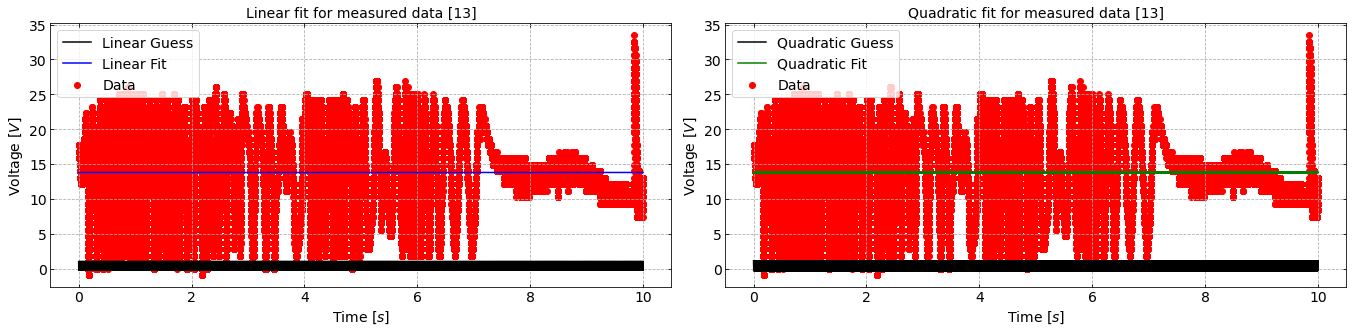

In [13]:
#Here using subplots to get 6 graphs for each iteration together.

lin_const = []
lin_sigma = []
quad_const =[]
quad_sigma =[]

fig, axes = plt.subplots(1,2, figsize=(32*cm,8*cm)) #figure done in inches, use this to choose a good scale
axes = axes.flatten() #Means we can iterate over it

# Here is my loop where I plot for curve fits with different powers.
for i in range(len(time)):
    # Find the index where voltage data starts to rise (assuming data starts from a flat line)
    start_index = np.argmax(np.diff(V1[i]) > 0)

    # Linear fit
    axes[0].cla()  # Clear the first subplot
    plt.sca(axes[0])  # Set current axis to the first subplot
    popt_1, pcov_1 = sp.curve_fit(Linear_fit, time[i][start_index:], V1[i][start_index:], p0=p0_lin, absolute_sigma=True)
    # Calculate the standard deviations of the fitted parameters
    lin_err = np.sqrt(np.diag(pcov_1))
    plt.title(f'Linear fit for measured data {[i+1]}')
    plt.plot(time[i], Linear_fit(time[i], *p0_lin), label='Linear Guess', color='black')  # Plot linear fit
    plt.plot(time[i], Linear_fit(time[i], *popt_1), label='Linear Fit', color='blue')  # Plot linear fit
    plt.scatter(time[i], V1[i], label='Data', color='red')  # Plot data points
    plt.xlabel('Time [$s$]')
    plt.ylabel('Voltage [$V$]')
    plt.grid(ls='--')
    plt.legend()

    # Quadratic fit
    axes[1].cla()  # Clear the first subplot
    plt.sca(axes[1])  # Set current axis to the second subplot
    popt_2, pcov_2 = sp.curve_fit(Quad_fit, time[i][start_index:], V1[i][start_index:], p0=p0_Quad, absolute_sigma=True)
    # Calculate standard deviation of the fitted parameters
    quad_err = np.sqrt(np.diag(pcov_2))
    plt.title(f'Quadratic fit for measured data {[i+1]}')
    plt.plot(time[i], Quad_fit(time[i], *p0_Quad), label='Quadratic Guess', color='black')  # Plot quadratic fit
    plt.plot(time[i], Quad_fit(time[i], *popt_2), label='Quadratic Fit', color='green')  # Plot quadratic fit
    plt.scatter(time[i], V1[i], label='Data', color='red')  # Plot data points
    plt.xlabel('Time [$s$]')
    plt.ylabel('Voltage [$V$]')
    plt.legend()
    plt.grid(ls='--')
    plt.tight_layout()

    # Print statements to get the fitted parameters
    print("Linear Parameters:")
    print("Amplitude:", popt_1[0], '$\pm$', lin_err[0])
    print("n:", popt_1[1], '$\pm$', lin_err[1])
    lin_const.append(popt_1[1])
    lin_sigma.append(lin_err[1])
    print("Offset:", popt_1[2], '$\pm$', lin_err[2])
    print()
    print("Quadratic Parameters:")
    print("Amplitude:", popt_2[0], "+/-", [0])
    print("n:", popt_2[1], "+/-", quad_err[1])
    print("Offset:", popt_2[2], "+/-", quad_err[2])
    print("m:", popt_2[3], "+/-", quad_err[3])
    plt.show()

